In [ ]:
pip install --force-reinstall agent_system/dist/mesa_restaurant_agents-0.0.1-py3-none-any.whl

In [1]:
import mesa
from mesa_restaurant_agents.model.restaurant_model import RestaurantModel
import pandas as pd

params = {"n_waiters":4, "grid_width":20, "grid_height": 20}

results = mesa.batch_run(
    RestaurantModel,
    parameters=params,
    iterations=1,
    max_steps=300,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)

# Handle data conversion with explicit types
df = pd.DataFrame(results)
numeric_cols = ['Step', 'Customer_Count', 'Average_Wait_Time', 'Average_Customer_Satisfaction', 'Profit']
df[numeric_cols] = df[numeric_cols].fillna(0).astype(float)
 
# Get only columns with data
non_empty_cols = [col for col in df.columns if df[col].notna().any()]
df[non_empty_cols].head()

  0%|          | 0/1 [00:00<?, ?it/s]

Running HiGHS 1.9.0 (git hash: 66f735e): Copyright (c) 2024 HiGHS under MIT licence terms
Day 1, Hour 12:00:
Customers paid: 0
Customers left without paying: 0
Current profit: $0.00

Day 1, Hour 13:00:
Customers paid: 2
Customers left without paying: 0
Current profit: $51.00

Day 1, Hour 14:00:
Customers paid: 30
Customers left without paying: 0
Current profit: $775.20

Starting shift 2: Afternoon
Shift 2: 2 waiters needed, 5 currently active
Removed 3 excess waiters
Day 1, Hour 15:00:
Customers paid: 86
Customers left without paying: 0
Current profit: $2208.30

Day 1, Hour 16:00:
Customers paid: 118
Customers left without paying: 5
Current profit: $3024.30

Day 1, Hour 17:00:
Customers paid: 134
Customers left without paying: 8
Current profit: $3432.30

Day 1, Hour 18:00:
Customers paid: 140
Customers left without paying: 8
Current profit: $3585.30

Starting shift 3: Evening
Shift 3: 2 waiters needed, 2 currently active
No change in waiters for shift 3
Day 1, Hour 19:00:
Customers pai

,RunId,iteration,Step,n_waiters,grid_width,grid_height,day,shift,time,Customer_Count,Waiters_Count,Average_Wait_Time,Average_Customer_Satisfaction,Profit,Customer_Info,Waiter_Info,GridState,Daily_Stats
0,0,0,0.0,5,20,20,1,1.0,660,0.0,5,0.000000,100.000000,0.0,[],"[{'waiter_nr': 1, 'tips': 0, 'served_customers...","[{'pos': (12, 12), 'type': 'Kitchen'}, {'pos':...",[{}]
1,0,0,1.0,5,20,20,1,1.0,660,0.0,5,0.000000,100.000000,0.0,[],"[{'waiter_nr': 1, 'tips': 0, 'served_customers...","[{'pos': (12, 12), 'type': 'Kitchen'}, {'pos':...",[{}]
2,0,0,2.0,5,20,20,1,1.0,665,1.0,5,0.000000,100.000000,0.0,"[{'customer_nr': 7, 'waiting_time': 0, 'order_...","[{'waiter_nr': 1, 'tips': 0, 'served_customers...","[{'pos': (12, 12), 'type': 'Kitchen'}, {'pos':...",[{}]
3,0,0,3.0,5,20,20,1,1.0,665,1.0,5,0.000000,100.000000,0.0,"[{'customer_nr': 7, 'waiting_time': 0, 'order_...","[{'waiter_nr': 1, 'tips': 0, 'served_customers...","[{'pos': (12, 12), 'type': 'Kitchen'}, {'pos':...",[{}]
4,0,0,4.0,5,20,20,1,1.0,670,3.0,5,1.666667,96.666667,0.0,"[{'customer_nr': 7, 'waiting_time': 5, 'order_...","[{'waiter_nr': 1, 'tips': 0, 'served_customers...","[{'pos': (12, 12), 'type': 'Kitchen'}, {'pos':...",[{}]


In [ ]:
# from mesa_restaurant_agents.model.restaurant_model import RestaurantModel

# model = RestaurantModel(n_waiters=10, grid_width=23, grid_height=23)
# for i in range(500):
#     model.step()

In [ ]:
print(results[0])

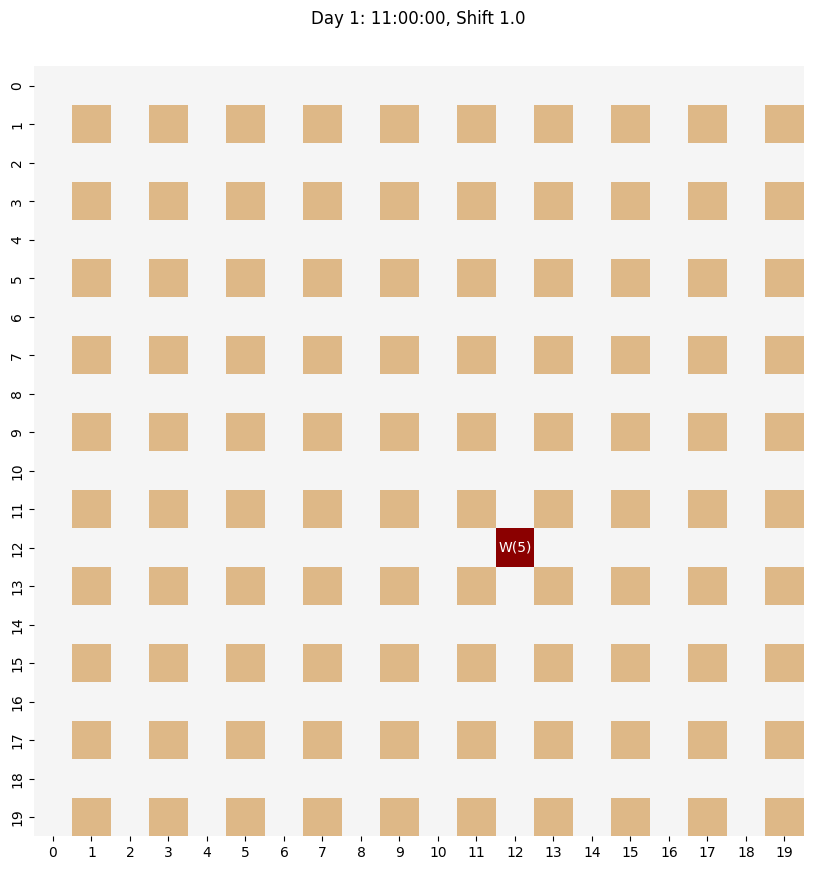

In [2]:
from mesa_restaurant_agents.visualization import *
from mesa_restaurant_agents.visualization import GridAnimator

# Create an instance of GridAnimator
animator = GridAnimator(results)

ani = animator.animate_first_run()
ani.save('animated_heatmap.gif', writer='pillow', fps=2, dpi=80)

In [ ]:
df_mean_step = display_mean_step_results(results)

In [ ]:
customer_infos_df = display_first_run_step_results_customer(results)
waiter_infos_df = display_first_run_step_results_waiter(results)